In [5]:
import torch
import torch.nn as nn 

x = torch.ones(1)
linear_model = nn.Linear(1,1)
linear_model(x)

tensor([-1.2214], grad_fn=<ViewBackward0>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[-0.5508]], requires_grad=True)

In [7]:
x = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0,6.0, 13.0,21.0]
y = [35.7, 55.9,58.2,81.9,56.3,48.9,33.9,21.8,48.4,60.4,68.4]

x = torch.tensor(x).unsqueeze(1)
y = torch.tensor(y).unsqueeze(1)

x.shape

torch.Size([11, 1])

# image classification example

In [2]:
import torch
from torchvision import datasets

cifar_10 = datasets.CIFAR10('.', train=True, download= True)
cifar_10_val = datasets.CIFAR10('.', train=False, download= True)


100%|██████████| 170498071/170498071 [00:15<00:00, 10982608.76it/s]


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [6]:
print(len(cifar_10), len(cifar_10_val))

50000 10000


In [28]:
img, label = cifar_10[1]
img, label

(<PIL.Image.Image image mode=RGB size=32x32>, 9)

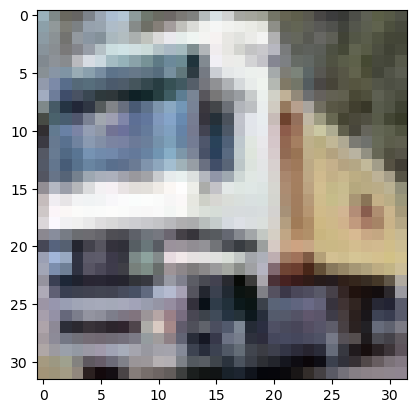

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [18]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [32]:
tensor_cifar10 = datasets.CIFAR10('.', train= True, download=True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:18<00:00, 9191343.00it/s] 


Extracting ./cifar-10-python.tar.gz to .


In [34]:
input_t, label_t = tensor_cifar10[1]
type(input_t)

torch.Tensor

In [35]:
input_t.dtype

torch.float32

In [40]:
input_t = input_t.permute(1,2,0)
input_t.shape

torch.Size([32, 32, 3])

In [52]:
input_imgs = torch.stack([img for img,_ in tensor_cifar10], dim = 3)
input_imgs.shape

torch.Size([3, 32, 32, 50000])

In [56]:
# 평균구하기 
img = input_imgs.permute(3,1,2,0)
img[0].shape

torch.Size([32, 32, 3])

In [61]:
print(input_imgs.view(3, -1).mean(dim=1))
print(input_imgs.view(3, -1).std(dim=1))



tensor([0.4914, 0.4822, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


In [73]:
transform= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])



In [74]:
# 비행기와 새를 구분해보자
cifar10 = datasets.CIFAR10('.', train=True, download=False, transform=transform)
cifar10_val = datasets.CIFAR10('.', train=False, download=False, transform=transform)

label_map = {0:0, 2:1}
class_name = ['airplane', 'bird']

cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0,2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0,2]]

In [85]:
cifar2[0][0].shape

torch.Size([3, 32, 32])

In [86]:
import torch.nn as nn

outdim = 2

model = nn.Sequential(
    nn.Linear(3072, 512,),
    nn.Tanh(),
    nn.Linear(512, outdim,),
    nn.Softmax(dim =1)
)




In [ ]:
img_batch = cifar2

In [3]:
# 분류기 훈련

import torch
from torchvision import transforms, datasets

transform= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

label_map = {0:0, 2:1}
class_name = ['airplane', 'bird']

cifar10 = datasets.CIFAR10('.', train=True, download=False, transform=transform)
cifar10_val = datasets.CIFAR10('.', train=False, download=False, transform=transform)

cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0,2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0,2]]

In [10]:
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.NLLLoss()

n_epochs = 100
count = 0

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
        print('Sample: %d, Epoch: %d, Loss: %f' %(count, epoch+1, float(loss)))

    #print('Epoch: %d, Loss: %f' %(epoch+1, float(loss)))



Sample: 1, Epoch: 1, Loss: 0.726866
Sample: 2, Epoch: 1, Loss: 1.070894
Sample: 3, Epoch: 1, Loss: 1.862009
Sample: 4, Epoch: 1, Loss: 0.029692
Sample: 5, Epoch: 1, Loss: 0.386410
Sample: 6, Epoch: 1, Loss: 0.390761
Sample: 7, Epoch: 1, Loss: 3.593712
Sample: 8, Epoch: 1, Loss: 5.077700
Sample: 9, Epoch: 1, Loss: 0.387402
Sample: 10, Epoch: 1, Loss: 3.153616
Sample: 11, Epoch: 1, Loss: 0.043150
Sample: 12, Epoch: 1, Loss: 2.822428
Sample: 13, Epoch: 1, Loss: 0.025382
Sample: 14, Epoch: 1, Loss: 2.095093
Sample: 15, Epoch: 1, Loss: 0.215249
Sample: 16, Epoch: 1, Loss: 0.138729
Sample: 17, Epoch: 1, Loss: 3.390251
Sample: 18, Epoch: 1, Loss: 0.590848
Sample: 19, Epoch: 1, Loss: 0.225444
Sample: 20, Epoch: 1, Loss: 0.143228
Sample: 21, Epoch: 1, Loss: 3.000412
Sample: 22, Epoch: 1, Loss: 0.104575
Sample: 23, Epoch: 1, Loss: 1.168854
Sample: 24, Epoch: 1, Loss: 1.557932
Sample: 25, Epoch: 1, Loss: 0.354644
Sample: 26, Epoch: 1, Loss: 0.897943
Sample: 27, Epoch: 1, Loss: 1.654728
Sample: 28

KeyboardInterrupt: 

In [13]:
# 위의 훈련 루프는 개별 sample에 접근하기 때문에 최적 loss에 수렴하기 힘들다 -> mini batch 사용
# torch.utils.data 모듈의 dataloader를 사용하자

train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512,2),
    nn.LogSoftmax(dim=1)
)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        out = model(imgs.view(batch_size, -1))
        loss = loss_fn(out, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

    print('Epoch: %d, Loss: %f' %(epoch+1, float(loss)))

Epoch: 1, Loss: 0.338290
Epoch: 2, Loss: 0.551579
Epoch: 3, Loss: 0.399273
Epoch: 4, Loss: 0.462528
Epoch: 5, Loss: 0.723151
Epoch: 6, Loss: 0.366518
Epoch: 7, Loss: 0.345520
Epoch: 8, Loss: 0.421110
Epoch: 9, Loss: 0.249238
Epoch: 10, Loss: 0.449612
Epoch: 11, Loss: 0.358954
Epoch: 12, Loss: 0.521935
Epoch: 13, Loss: 0.250480
Epoch: 14, Loss: 0.509252
Epoch: 15, Loss: 0.314441
Epoch: 16, Loss: 0.365412
Epoch: 17, Loss: 0.347829
Epoch: 18, Loss: 0.264527
Epoch: 19, Loss: 0.208617
Epoch: 20, Loss: 0.570658
Epoch: 21, Loss: 0.180336
Epoch: 22, Loss: 0.183913
Epoch: 23, Loss: 0.219329
Epoch: 24, Loss: 0.286380
Epoch: 25, Loss: 0.159275
Epoch: 26, Loss: 0.153940
Epoch: 27, Loss: 0.325002
Epoch: 28, Loss: 0.205517
Epoch: 29, Loss: 0.114782
Epoch: 30, Loss: 0.261881
Epoch: 31, Loss: 0.153582
Epoch: 32, Loss: 0.195379
Epoch: 33, Loss: 0.158378
Epoch: 34, Loss: 0.124550
Epoch: 35, Loss: 0.287289
Epoch: 36, Loss: 0.136385
Epoch: 37, Loss: 0.244825
Epoch: 38, Loss: 0.345993
Epoch: 39, Loss: 0.10

In [16]:
# validation

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 64, shuffle =True)

correct = 0
total = 0

# inference
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        # torch.max -> value, indices 반환
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    
    print("Accuracy: %f " %(correct / total))



Accuracy: 0.818000 
